<a href="https://colab.research.google.com/github/sbowma15/perceptron_models_with_logistic_regression/blob/main/perceptron_models_with_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 39AA - Notebook 2: A Simple Perceptron Model

### Objectives of this Notebook
* Quick intro/review of logistic regression
* Implement/experiment with a toy example of a perceptron
* Understand how perceptron is related to logistic regression
* See gradient descent implemented with numpy and PyTorch
* Implement a basic model w/ PyTorch


## I. Logistic Regression

### 1: Generate data
Import necessary modules and generate synthetic data with appropriate size/dimensions.


In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Seaborn is a data visualization library

N = 100 # total number of observations
D_in = 1 # input dimension (i.e. dimension of a single observation's x vector)
D_out = 1 # output dimension (i.e. y), so just 1 for this example

# Create random input data and derive the 'true' labels/output

# Returns a sample (or samples) from the “standard normal” distribution.
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
#Documentation says we should be multiplying by sigma here and adding mu.
#This scenario generates a 1 dimentional array
x = np.random.randn(N, D_in) + 1

#print(x)

#adding
def true_y(x_in, n_obs):
    def addNoise(x):
        if abs(x-1) < 0.1:
            return 0.1
        elif abs(x-1) < 1.0:
            return 0.02
        else:
            return 0.01
#Applies a function to 1-D slices along the given axis. In this case function-
#- x is used as the first parameteter. The second parameter is the axis on which
#-the one Dimensional slice will be taken
#https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html
#basically, if if the new random matrix is smaller than the one dimensional -
#- matrix with noise added, then we know x is smaller than 1. Conversley, if -
#this isnt true, we know x is greater than 1.
    return np.apply_along_axis(lambda x: [int(x < 1) if random.random() < addNoise(x) else int(x > 1)], 1, x_in)

#y = true_y(x, N).flatten()
z= y.sum() #summing the ones to find numer of trues
print(y) #prints matrix with one or zero as true or false based on above logic
print(z)#the sum of ones prints how many truths

[1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0
 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1]
56


Plot the generated data to see x and y. Note that the y outcomes/labels belong to one of two classes.

Positive cases are shown in blue while negative cases are in red.

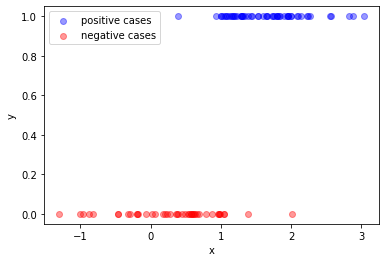

In [ ]:
plt.scatter(x[y == 1,0], y[y == 1], c='blue', alpha=0.4)
plt.scatter(x[y == 0,0], y[y == 0], c='red', alpha=0.4)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(('positive cases', 'negative cases'), loc='upper left')
plt.show()

### 2. Fit Logistic Regression Model

Let's find estimates for b0 and b1 using a traditional logistic regression model in order to predict/estimate the probability that y is in the positive or negative class for any given x. The function used to isolate the linear function of x is the logit function, defined as:

* $\mathrm{logit}(y_i) = \beta_0 + \beta_1*x_i$

for $i = 1, ... N$.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(random_state=1, max_iter=100, tol=1e-4, solver='liblinear')
logreg_model.fit(x, y)

print(f" beta0 = {logreg_model.intercept_[0]:.4f}")
print(f" beta1 = {logreg_model.coef_[0][0]:.4f}")
y_pred = logreg_model.predict_proba(x)
lr_loss = 1/N * np.square(y - y_pred[:,1]).sum()
print(f" loss (mse) = {lr_loss:.4f}")

 beta0 = -2.5204
 beta1 = 2.3650
 loss (mse) = 0.0975


### TASK 1

TRY COPYING THE ABOVE CELL AND USING A DIFFERENT 'SOLVER'. SEE THE [SCIKIT LEARN DOCUMENTATION ON LOG REG](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.logisticregression.html) IF NECESSARY TO SEE WHAT THE NAMES OF THE OTHER SOLVERS ARE.

DESCRIBE THE RESULTS YOU SAW ABOVE. HOW DID THE LOSS AND PARAMETER ESTIMATES CHANGE WHEN YOU USED A DIFFERENT SOLVER? WHICH SOLVER DO YOU THINK IS THE BEST AND WHY?


_THIS CONTENTS OF THIS CELL SHOULD BE REMOVED/EDITED AND REPLACED WITH YOUR OWN WORDS AS A REPLY TO THE QUESTION/TASK GIVEN HERE._

To find those estimates scikit learn's LogisticRegression model solved an optimization problem. The optimization was to minimize the loss function, defined as:

$\mathrm{Loss} = \frac{1}{N} \sum_i^N (y_i - \hat{y}_i)^2$

For $\hat{y}_i$ we will use the inverse of the logit (i.e. the logistic function, which itself is a generalization of the sigmoid function).

$\hat{y}_i = (1 + e^{-\beta_1*x_i - \beta_0})^{-1}$

Note that the loss can be written as a function of $\beta_0$, $\beta_1$. Thus, estimating these parameters is done by minimizing the loss function with respect to $\beta_0$, $\beta_1$.

Let's now plot the surface of the loss function with $beta_0$ and $beta_1$ on the x and y axes, respectively.

Notice that there are many values of $beta_0$, $\beta_1$ that may yield a reasonable minimum value. In other words, there is no single point on the surface displayed here where the loss has an obvivous global minimum.

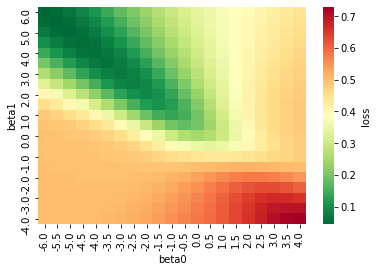

In [ ]:
b1s = np.arange(6, -4.1, -0.5)
b0s = np.arange(-6, 4.1, 0.5)
surf = np.array( [[1/N * np.square(y - 1 / (1 + np.exp(-1 * (b1s[i]*x[:,0] + b0s[j])))).sum() for j in range(len(b0s))] for i in range(len(b1s))] )
df = pd.DataFrame(surf, columns=b0s, index=b1s)
p1 = sns.heatmap(df, cbar_kws={'label': 'loss'}, cmap="RdYlGn_r")
plt.xlabel("beta0")
plt.ylabel("beta1")
plt.show()

### 3: Predict y for a Newly Observed x

Try plotting the logistic function for a few values of $\beta_0$, $\beta_1$ on top of the data to see if it is a reasonable fit.

Note a final step we have not yet described is to determine the threshold of the logistic function for which we will predict a positive or negative case.

For example, for $\beta_0 = \beta_1 = 3$, if we are given a new observation with $x = 1.5$, and we need to predict whether it is a positive or negative case, then we start by evaluating the logistic function at $x = 1.5$. This yields $\hat{y} = 0.8176$ (see below).

Oftentimes a threshold of 0.5 is employed. Since 0.8176 > 0.5, we would predict this to be a positive case for the typical threshold value.

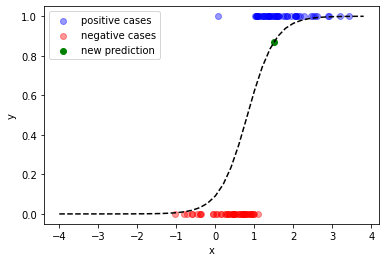

0.8698915256370021

In [ ]:
b0 = -2.3
b1 = 2.8

plt.scatter(x[y == 1,0], y[y == 1], c='blue', alpha=0.4)
plt.scatter(x[y == 0,0], y[y == 0], c='red', alpha=0.4)
plt.xlabel("x")
plt.ylabel("y")

x_new = 1.5
y_hat_new = 1 / (1 + np.exp(-b0 - b1*x_new))
plt.scatter(x_new, y_hat_new, color="green")
plt.legend(('positive cases', 'negative cases', 'new prediction'), loc='upper left')

xes = np.arange(-4, 4, 0.2)
plt.plot(xes, 1/(1 + np.exp(-b0 - b1*xes)), 'k--')

plt.show()
y_hat_new


## II. A Simple Perceptron


### 1. Simple Perceptron w/ NumPy

Using the same $x$ and $y$ data as before we will now see how a simple perceptron network with a sigmoid activiation function is equivalent to the logistic regression model above. Rather than $\beta_0$, $\beta_1$, the parameters to be estimated are generally referred to as the weight and bias terms ($w$ and $b$, respectively). For this simple case they differ only in name though, such that:
* $\beta_0 = b$
* $\beta_1 = w$

To begin we will manually train the perceptron using numpy and gradient descent to minimize the loss. This will involve taking the derivatives of $w$ and $b$ (using the chain rule) to calculate the gradients in an interative process.


In [ ]:
# Randomly initialize parameters to be estimated
np.random.seed(42)
w = np.random.randn(1) #B1
b = np.random.randn(1) #B0

# learning rate parameter
learning_rate = 5e-1

# keep track of loss to see how the optimization performs
loss = []

# Begin gradient descent using all of the observations in each iteration
for i in range(250):

    # Forward pass: compute predicted y
    lin_pred = w[0] * x[:,0] + b[0]
    #np.exp calculates the exponential of all elements in the input array.
    #https://stackoverflow.com/questions/31951980/what-exactly-does-numpy-exp-do
    y_pred = 1 / (1 + np.exp(-1 * lin_pred))

    # Compute and store loss, and print occassionally
    loss.append(1/N * np.square(y - y_pred).sum())
    if i % 50 == 0:
        print(f"iteration {i}: loss = {loss[i]:.4f}, w = {w[0]:.4f}, b = {b[0]:.4f}")

    # Backprop to compute gradients of w and b with respect to log loss
    dloss_dypred = -2.0 / N * (y - y_pred)
    dypred_dlinpred = np.exp(-lin_pred) * (1 / np.square(1 + np.exp(-1 * lin_pred)))
    dlinpred_dw = x[:,0]
    dlinpred_db = 1

    # Backprop to compute gradients of w and b with respect to loss and being careful not to sum up intermediate parts
    #grad_w = -2 / N * (y - 1 / (1 + np.exp(-1 * lin_pred))) * (1 / np.square(1 + np.exp(-1 * lin_pred))) * x[:,0] * np.exp(-lin_pred)
    #grad_b = -2 / N * (y - 1 / (1 + np.exp(-1 * lin_pred))) * (1 / np.square(1 + np.exp(-1 * lin_pred))) * np.exp(-lin_pred)

    # Calculate gradients and update weight and bias parameters
    grad_w = (dloss_dypred * dypred_dlinpred * dlinpred_dw).sum()
    grad_b = (dloss_dypred * dypred_dlinpred * dlinpred_db).sum()
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b

print(f" w = {w.item():.4f}")
print(f" b = {b.item():.4f}")

iteration 0: loss = 0.1895, w = 0.4967, b = -0.1383
iteration 50: loss = 0.1194, w = 1.3367, b = -1.1210
iteration 100: loss = 0.0984, w = 1.8146, b = -1.6621
iteration 150: loss = 0.0874, w = 2.1688, b = -2.0468
iteration 200: loss = 0.0804, w = 2.4558, b = -2.3527
 w = 2.6998
 b = -2.6101


### TASK 2

WHAT ARE THE SHAPE AND DIMENSIONS OF DLOSS_DYPRED, DYPRED_DLINPRED, AND DLINPRED_DW?

WHAT ARE THE SHAPES AND DIMENSIONS OF GRAD_W? AND GRAD_B?

FINALLY, WHAT IS THE SHAPE AND DIMENSIONS OF W AND B?

_THIS CONTENTS OF THIS CELL SHOULD BE REMOVED/EDITED AND REPLACED WITH YOUR OWN WORDS AS A REPLY TO THE QUESTION/TASK GIVEN HERE._

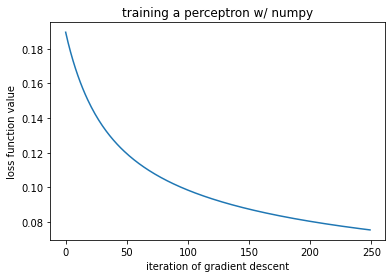

In [ ]:
plt.plot(range(0,len(loss)), loss)
plt.title("training a perceptron w/ numpy")
plt.xlabel("iteration of gradient descent")
plt.ylabel("loss function value")
plt.show()

### TASK 3

TWO CODE CELLS ABOVE, THE FIRST LINE OF CODE SETS THE NUMPY RANDOM SEED TO 42. TRY CHANGING THE SEED FROM 42 TO SOME OTHER POSITIVE INTEGER AND THEN RE-RUN THAT CELL AND THE ONE ABOVE THAT PLOTS THE LOSS FUNCTION AT EACH ITERATION (I.E. EPOCH).

DOES THE CURVE CHANGE MUCH WHEN A DIFFERENT SEED IS USED? DOES THE FINAL VALUE OF THE LOSS FUNCTION AT THE END OF TRAINING CHANGE? DESCRIBE WHAT YOU SEE.

_THIS CONTENTS OF THIS CELL SHOULD BE REMOVED/EDITED AND REPLACED WITH YOUR OWN WORDS AS A REPLY TO THE QUESTION/TASK GIVEN HERE._

### 2. Simple Perceptron w/ a PyTorch

Now we will train a basic perceptron using PyTorch to take advantage of its ability to perform automatic differentation. This allows us to avoid calculating derivatives manually.

In [ ]:
import torch

# Randomly initialize weights and other data
torch.manual_seed(42)
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
x_tensor = torch.tensor(x)
y_tensor = torch.tensor(y)
learning_rate = 5e-1
losses = []

# Carry out gradient descent
for i in range(250):

    # Forward pass: compute predicted y
    lin_pred = w * x_tensor + b
    y_pred = lin_pred.flatten().sigmoid()

    # Compute and store loss, and print occassionally
    loss = 1/N * (y_tensor - y_pred).pow(2).sum()
    losses.append(loss.item())
    if i % 50 == 0:
        print(f"iteration {i}: loss = {loss.item():.4f}, w = {w[0]:.4f}, b = {b[0]:.4f}")

    # Backprop using PyTorch's automatic differentiation
    loss.backward()

    # Update parameters but don't include these calculations as part of underlying computational graph
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Reset gradients for next iteration
    w.grad.zero_()
    b.grad.zero_()

print(f" w = {w.item():.4f}")
print(f" b = {b.item():.4f}")

iteration 0: loss = 0.2147, w = 0.3367, b = 0.1288
iteration 50: loss = 0.1246, w = 1.2473, b = -1.0150
iteration 100: loss = 0.1006, w = 1.7534, b = -1.5945
iteration 150: loss = 0.0887, w = 2.1211, b = -1.9955
iteration 200: loss = 0.0813, w = 2.4161, b = -2.3107
 w = 2.6656
 b = -2.5742


### TASK 4

CHANGE THE LEARNING RATE IN THE CELL ABOVE FROM 0.5 (5E-1) TO 0.05 (5E-2). THEN RE-RUN THE CELL.

WHAT HAPPENS TO THE LOSS OVER THE 250 ITERATIONS? HOW MANY ITERATIONS ARE NEEDED TO ARRIVE AT THE SAME LOSS OF AROUND 0.08 OR 0.07 WHEN THE LEARNING RATE IS 0.05?

_THIS CONTENTS OF THIS CELL SHOULD BE REMOVED/EDITED AND REPLACED WITH YOUR OWN WORDS AS A REPLY TO THE QUESTION/TASK GIVEN HERE._

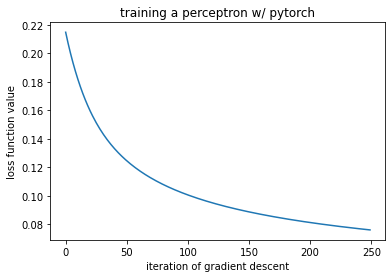

In [ ]:
plt.plot(range(0,len(losses)), losses)
plt.title("training a perceptron w/ pytorch")
plt.xlabel("iteration of gradient descent")
plt.ylabel("loss function value")
plt.show()

## III. Using PyTorch to Define a Perceptron

### 1: A Simple Perceptron using PyTorch

Now we will train a basic perceptron using PyTorch to define the model architecture itself, while continuing to take advantage of its automatic differentation.

In [ ]:
# Randomly initialize weights and other data
torch.manual_seed(42)
w = torch.randn(1, requires_grad=True).reshape(1,1)
b = torch.randn(1, requires_grad=True).reshape(1,1)
x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y).float().reshape(N, D_out)

# Define and declare a pytorch perceptron using sigmoid activation function
model = torch.nn.Sequential(
    torch.nn.Linear(1, 1),
    torch.nn.Sigmoid()
)

# Define loss function to be used
loss_fn = torch.nn.MSELoss()

learning_rate = 5e-1
losses = []

# Carry out gradient descent
for i in range(250):

    # Forward pass: compute predicted y
    y_pred = model.forward(x_tensor)

    # Compute and store loss, and print occassionally
    loss = loss_fn(y_pred, y_tensor)
    losses.append(loss.item())
    if i % 50 == 0:
        print(f"iteration {i}: loss = {loss.item():.4f}")

    model.zero_grad()

    # Backprop using PyTorch's automatic differentiation
    loss.backward()

    # Update parameters but don't include these calculations as part of underlying computational graph
    with torch.no_grad():
        for param in model.parameters():
            param.data -= learning_rate * param.grad

print("w and b:")
for param in model.parameters():
    print(f"    {param.item():.4f}")

iteration 0: loss = 0.2892
iteration 50: loss = 0.1308
iteration 100: loss = 0.1031
iteration 150: loss = 0.0902
iteration 200: loss = 0.0822
w and b:
    2.6300
    -2.5367


### TASK 5

TRY CHANGING THE ACTIVATION FUNCTION THAT IS USED ABOVE TO Tanh. CURRENTLY THE Sigmoid ACTIVIATION FUNCTION IS USED, BUT THERE ARE MANY OTHERS (IF YOU'RE CURIOUS, [SEE PYTORCH DOCUMENTATION ON ACTIVATION FUNCTIONS](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)).

AFTER SWITCHING TO TANH, RE-RUN THE CELL ABOVE AND BELOW. DOES THE VALUE OF THE LOSS AFTER 250 ITERATIONS/EPOCHS CHANGE MUCH? WERE 250 ITERATIONS/EPOCHS NEEDED? OR WOULD MORE OR LESS HAVE BEEN OKAY?

DO THE VALUES OF W AND B CHANGE MUCH? WHY DO YOU THINK THIS MIGHT BE?

_THIS CONTENTS OF THIS CELL SHOULD BE REMOVED/EDITED AND REPLACED WITH YOUR OWN WORDS AS A REPLY TO THE QUESTION/TASK GIVEN HERE._

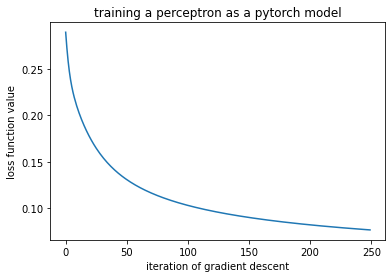

In [ ]:
plt.plot(range(0,len(losses)), losses)
plt.title("training a perceptron as a pytorch model")
plt.xlabel("iteration of gradient descent")
plt.ylabel("loss function value")
plt.show()

### 2. PyTorch Optimizer

Now we will train a basic perceptron using PyTorch to define the model itself and also to carry out the optimization steps using stochastic gradient descent (a variant of gradient descent that attempts to avoid getting stuck in a local minima).

In [ ]:
# Randomly initialize weights and other data
torch.manual_seed(42)
w = torch.randn(1, requires_grad=True).reshape(1,1)
b = torch.randn(1, requires_grad=True).reshape(1,1)
x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y).float().reshape(N, D_out)

# Define a Perceptron class
#class Perceptron(torch.nn.Module):
#    def __init__(self, input_dim):
#        super(Perceptron, self).__init__()
#        self.lay1 = torch.nn.Linear(input_dim, 1)
#        self.act = torch.nn.Sigmoid()
#    def forward(self, x):
#        output = self.lay1(x)
#        output = self.act(output)
#        return output

# Declare a perceptron instance
model = torch.nn.Sequential(
    torch.nn.Linear(1, 1),
    torch.nn.Sigmoid()
)

# Define loss function to be used
loss_fn = torch.nn.MSELoss()
learning_rate = 5e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
losses = []

# Carry out gradient descent
for i in range(200):

    # Forward pass: compute predicted y
    y_pred = model.forward(x_tensor)

    # Compute and store loss, and print occassionally
    loss = loss_fn(y_pred, y_tensor)
    losses.append(loss.item())
    if i % 50 == 0:
        print(f"iteration {i}: loss = {loss.item():.4f}") #" w = {w[0]:.4f}, b = {b[0]:.4f}")

    # Zero all gradients before backward pass
    optimizer.zero_grad()

    # Backprop then call optimizer step to update all (relevant) model parameters
    loss.backward()
    optimizer.step()

print("w and b estimates:")
for param in model.parameters():
    print(f"    {param.item():.4f}")


iteration 0: loss = 0.2892
iteration 50: loss = 0.1016
iteration 100: loss = 0.0769
iteration 150: loss = 0.0659
w and b estimates:
    3.8176
    -3.8431


### TASK 6

TRY CHANGING THE LEARNING RATE ABOVE FROM 5E-2 TO 5E-1, AND THEN RE-RUN THE CELL ABOVE AND THE CELL BELOW. HOW MANY EPOCHS ARE NEEDED FOR THE LOSS TO GO BELOW ~0.05?

AFTER THAT, STILL USING THE LEARNING RATE OF 5E-1, TRY CHANGING THE OPTIMIZER FROM torch.nn.Adam to torch.nn.SGD. WHAT HAPPENS TO THE LOSS NOW? HOW MANY EPOCHS ARE NEEDED BEFORE THE LOSS GOES BELOW 0.05? (SEE [PYTORCH DOCUMENNTATION ON OPTIMIZERS](https://pytorch.org/docs/stable/optim.html#algorithms) IF YOU ARE CURIOUS AND WANT TO TRY OTHERS).

_THIS CONTENTS OF THIS CELL SHOULD BE REMOVED/EDITED AND REPLACED WITH YOUR OWN WORDS AS A REPLY TO THE QUESTION/TASK GIVEN HERE._

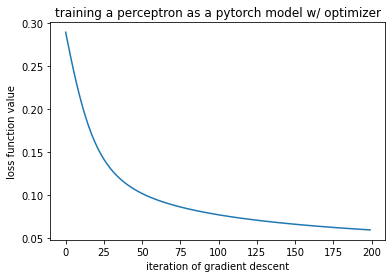

In [ ]:
plt.plot(range(0,len(losses)), losses)
plt.title("training a perceptron as a pytorch model w/ optimizer")
plt.xlabel("iteration of gradient descent")
plt.ylabel("loss function value")
plt.show()

References:
* [https://en.wikipedia.org/wiki/Perceptron]()
* [https://en.wikipedia.org/wiki/Logistic_regression]()
* [https://en.wikipedia.org/wiki/Gradient_descent]()
* [https://en.wikipedia.org/wiki/Chain_rule]()
